In [10]:
import numpy, seaborn, pandas
import scipy.stats as stats
import matplotlib, matplotlib.pyplot as plt

In [11]:
matplotlib.rcParams.update({'svg.fonttype' : 'none'})
#'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20,'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',                            'figure.figsize':(8, 5), 

In [12]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [13]:
#data Proteomics
df = pandas.read_csv(file_directory+'1) input/proteomics/Pilot_ProteomicsData.csv', 
                     sep = ',', index_col = 'Gene')
df = df.iloc[:,4:-3]

df.columns = df.columns.str.split('_').str[0]
df_with_tripl = df.copy()
df = df.groupby(axis=1, level=0).median()
df = df[['Ctrl', '3h', '6h', '9h', '12h', '16h']]

print(df.shape, '\n')
df.head(3)

(2405, 6) 



C:\Users\kja11\AppData\Local\Temp\ipykernel_21632\3986874491.py:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df = df.groupby(axis=1, level=0).median()


,Ctrl,3h,6h,9h,12h,16h
Gene,,,,,,
DIS3,92.9,96.6,91.6,105.8,103.0,115.5
LARP1,103.3,106.6,103.5,99.1,95.3,93.2
ACTB,100.9,107.1,102.3,94.4,93.9,100.4


# Data transformation

## To Zscore 

In [14]:
# Convert to Z_score
df_zscore = stats.zscore(df, axis = 0)
df_zscore.head(2)

,Ctrl,3h,6h,9h,12h,16h
Gene,,,,,,
DIS3,-1.092419,-0.367305,-1.569021,0.917407,0.601398,2.127101
LARP1,0.748607,1.131631,0.843713,-0.246745,-0.859439,-1.056857


# Methods

    Gene conditions  value
0   RPL6       Ctrl   98.3
1  RPS11       Ctrl   88.6
2  RPS23       Ctrl   90.8
3   RPL6       Ctrl  105.7
4  RPS11       Ctrl  109.5 



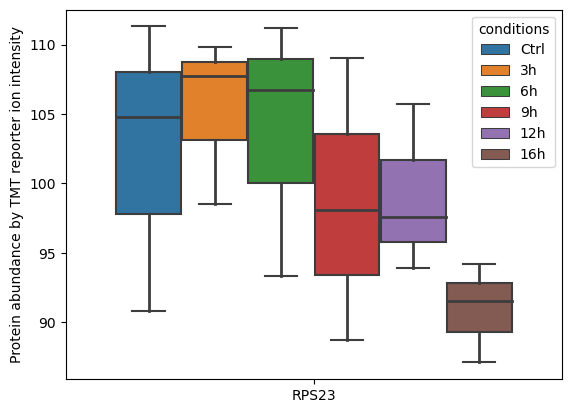

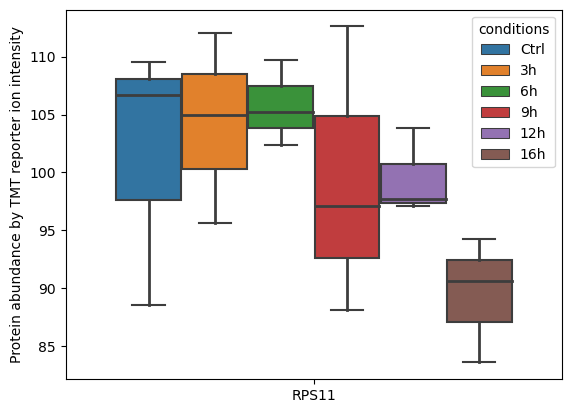

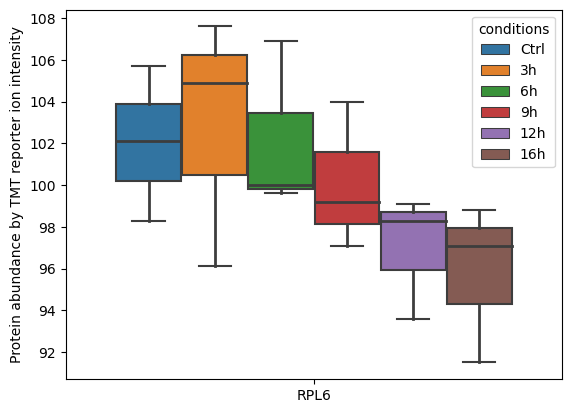

In [18]:
# Select the targets
target_genes = ['RPS23', 'RPS11', 'RPL6']
df_targets = df_with_tripl[df_with_tripl.index.isin(target_genes)]

# From Wide to Long table
df_targets = df_targets.reset_index()
df_targets = df_targets.melt(id_vars=["Gene"], var_name="conditions")

## pull the technical triplicate
df_targets['conditions'] = df_targets['conditions'].str.split('_').str[0]
print(f'{df_targets.head()} \n')

# Expression of the target proteins over time
for target in target_genes:
    df_plt = df_targets[df_targets['Gene'] == target]
    seaborn.boxplot(df_plt, y = 'value', x = 'Gene', hue = 'conditions', 
                medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    
    plt.ylabel("Protein abundance by TMT reporter ion intensity")
    plt.xlabel("")
    plt.show()
    plt.close()

In [ ]:
df_Ribosome = df_zscore[df_zscore.index.str.startswith('RP')]
print(df_Ribosome.shape)

non_ribosomal_proteins = ['RPS6KB1', 'RPRD2', 'RPRD1A', 'RPRD1B','RPP30', 'RPP25L',
                          'RPN1', 'RPN2','RPAP2', 'RPE', 'RPA1', 'RPA3', 'RPF2' ]

df_Ribosome = df_Ribosome[~df_Ribosome.index.str.contains('|'.join(non_ribosomal_proteins))]
print(df_Ribosome.shape)

In [ ]:
# Heatmap of proteins with rvalue > 0.6
## define the colors, one color per condition 

## plot heatmap
print('number of proteins:', len(df_Ribosome))
g =  seaborn.clustermap(df_Ribosome, 
                        cmap='bwr', 
                        row_cluster=True, 
                        col_cluster=False, 
                        vmin=-6.5, vmax=6.5,
                        cbar_kws={'label':'Protein abundance\n by TMT reporter ion intensity\n (z-score)'},
                        xticklabels=True, yticklabels=False, 
                        method='complete', metric='cosine')

g.ax_heatmap.xaxis.set_ticks_position('top')
g.ax_heatmap.xaxis.set_label_position('top')
